In [1]:
# Sample data
data_dict = {
    'Governance': 75,
    'Data Management': 90,
    'Model Development': 30,
    'Deployment': 70,
    'Monitoring and Evaluation': 20,
    'Continuous Improvement': 95
}
data = list(data_dict.items())

# Matplotlib stellar plot

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Helper functions

In [8]:
from itertools import chain, zip_longest
from math import ceil, pi

import matplotlib.pyplot as plt

# We will also need some helper functions, namely a function to round up to the nearest 10
# (round_up()) and a function to join two sequences (even_odd_merge()).
# In the latter, the values of the first sequence (a list or a tuple, basically)
# will fill the even positions and the values of the second the odd ones.
def round_up(value):
    """

    >>> round_up(25)

    30

    """
    return int(ceil(value / 10.0)) * 10


def even_odd_merge(even, odd, filter_none=True):
    """

    >>> list(even_odd_merge([1,3], [2,4]))

    [1, 2, 3, 4]

    """
    if filter_none:
        return filter(None.__ne__, chain.from_iterable(zip_longest(even, odd)))

    return chain.from_iterable(zip_longest(even, odd))

# That said, to plot data on a stellar chart, we need to apply some transformations,
# as well as calculate some auxiliary values. So, let's start by creating a function 
# (prepare_angles()) to calculate the angle of each axis on the chart (N corresponds 
# to the number of variables to be plotted).
def prepare_angles(N):
    angles = [n / N * 2 * pi for n in range(N)]

    # Repeat the first angle to close the circle

    angles += angles[:1]

    return angles

# Next, we need a function (prepare_data()) responsible for adjusting the original 
# data (data) and separating it into several easy-to-use objects.
def prepare_data(data):
    labels = [d[0] for d in data]  # Variable names

    values = [d[1] for d in data]

    # Repeat the first value to close the circle

    values += values[:1]

    N = len(labels)
    angles = prepare_angles(N)

    return labels, values, angles, N


# Lastly, for this specific type of chart, we require a function (prepare_stellar_aux_data())
# that, from the previously calculated angles, prepares two lists of auxiliary values:
# a list of intermediate angles for each pair of angles (stellar_angles) and a list of small
# constant values (stellar_values), which will act as the values of the variables
# to be plotted in order to achieve the star-like shape intended for the stellar chart.
def prepare_stellar_aux_data(angles, ymax, N):
    angle_midpoint = pi / N

    stellar_angles = [angle + angle_midpoint for angle in angles[:-1]]
    stellar_values = [0.05 * ymax] * N

    return stellar_angles, stellar_values

# At this point, we already have all the necessary ingredients for the stellar chart,
# so let's move on to the Matplotlib side of this tutorial. In terms of aesthetics,
# we can rely on a function (draw_peripherals()) designed for this specific purpose 
# (feel free to customize it!).
def draw_peripherals(ax, labels, angles, ymax, outer_color, inner_color, label_color):
    # X-axis

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels, color=label_color, size=10)

    # Y-axis

    ax.set_yticks(range(10, ymax, 10))
    ax.set_yticklabels(range(10, ymax, 10), color=inner_color, size=7)
    ax.set_ylim(0, ymax)
    ax.set_rlabel_position(0)

    # Both axes

    ax.set_axisbelow(True)

    # Boundary line

    ax.spines["polar"].set_color(outer_color)

    # Grid lines

    ax.xaxis.grid(True, color=inner_color, linestyle="-")
    ax.yaxis.grid(True, color=inner_color, linestyle="-")



In [13]:
def draw_stellar_mpl(
    ax,
    labels,
    values,
    angles,
    N,
    shape_color="tab:blue",
    outer_color="slategrey",
    inner_color="lightgrey",
    text_color="black",
    values_color="black",
    lollipop_background=True,
    lollipop_cmap="jet",
    display_values=False,
):
    # Limit the Y-axis according to the data to be plotted

    ymax = round_up(max(values))

    # Get the lists of angles and variable values

    # with the necessary auxiliary values injected

    stellar_angles, stellar_values = prepare_stellar_aux_data(angles, ymax, N)
    all_angles = list(even_odd_merge(angles, stellar_angles))
    all_values = list(even_odd_merge(values, stellar_values))

    # Apply the desired style to the figure elements
    draw_peripherals(ax, labels, angles, ymax, outer_color, inner_color, text_color)

    # Draw (and fill) the star-shaped outer line/area

    ax.plot(
        all_angles,
        all_values,
        linewidth=1,
        linestyle="solid",
        solid_joinstyle="round",
        color=shape_color,
    )

    ax.fill(all_angles, all_values, shape_color)

    # Add a small hole in the center of the chart

    ax.plot(0, 0, marker="o", color="white", markersize=3)

    if lollipop_background:
        if lollipop_cmap:
            plt.scatter(angles, values, s=250, c=values, cmap=lollipop_cmap, alpha=1)
        else:
            plt.scatter(angles, values, s=250, c="blue", alpha=1, edgecolors="blue")

    # Display value of data points
    for angle, value in zip(angles, values):
        ax.text(
            angle,
            value,
            str(int(value)),
            color=values_color,
            size=8,
            ha="center",
            va="center",
        )

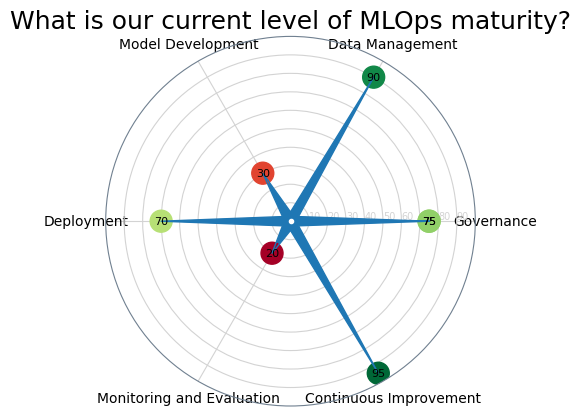

In [14]:
# Finally, let's get our chart on a blank canvas (figure).    
fig = plt.figure(dpi=100)
ax = fig.add_subplot(111, polar=True)  # Don't forget the projection!

labels, values, angles, N = prepare_data(data)

draw_stellar_mpl(
    ax,
    shape_color="tab:blue",
    outer_color="slategrey",
    inner_color="lightgrey",
    lollipop_background=True,
    lollipop_cmap='RdYlGn', #
    display_values=True,
    *prepare_data(data)
)
# title
plt.title("What is our current level of MLOps maturity?", fontsize = 18, color = "black")
plt.show()